<a href="https://colab.research.google.com/github/MaryDongsn/GNG-5125-clustering/blob/master/Assigmment2_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import nltk
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import shuffle
from string import punctuation

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree
from sklearn import neural_network

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# get the book list
bookList = gutenberg.fileids()
# print(bookList)
# books=bookList[0,3,4,5,6,7,8,11]
books = np.array(bookList[0])
books = np.append(books, bookList[3:8])
books = np.append(books, bookList[11])

# print(books)
# segment

def sampling(number_samples, sample_size, book_name):
    labeled_records = []
    book = gutenberg.raw(book_name)
    # print(book)
    # tokenize the material of the book
    raw_words = nltk.word_tokenize(book)
    # print(raw_words)
    # Prepare 200 documents for each book
    headers = random.sample(range(0, len(raw_words)), number_samples)

    for header in headers:
        segment = raw_words[header:(header + sample_size + 1)]
        labeled_records.append((segment, book_name))
    return labeled_records


def data_cleaning(sample_words):
    # customize the punctuation list by adding extra string
    extra_string = "'-- ``'' "
    update_punctuation = punctuation + extra_string
    # customize the stopwords list by adding extra stopwords
    sw = stopwords.words('english')
    extra_stopwords = "n't", "'s", "ar't", "'d", "'ll", "i'll"
    sw.extend(extra_stopwords)
    # Remove punctuation
    remove_punct_words = [w for w in sample_words if w not in update_punctuation]
    # Change all letters to lowercase
    lowercase_words = [w.lower() for w in remove_punct_words]
    # Strip "_" at the beginning or end of a word
    strip_words = [w.strip('_') for w in lowercase_words]
    # Remember digits/numbers (keeps only words)
    remove_number_words = [w for w in strip_words if w.isalpha()]
    # Remove stop words
    final_words = [w for w in remove_number_words if w not in sw]
    return final_words
if __name__ == "__main__":
    try_number_samples = 200
    try_sample_size = 150
    final_list = []
    for book_name in books:
        # print (book_name)
        labeled_list = sampling(try_number_samples, try_sample_size, book_name)
        cleaned_labeled_list = []

        for samples in labeled_list:
            book_name = samples[1]

            cleaned_seg = data_cleaning(samples[0])
            cleaned_labeled_seg = (cleaned_seg, book_name)
            # print(cleaned_labeled_seg)
            cleaned_labeled_list.append(cleaned_labeled_seg)
        # print(cleaned_labeled_list)
        final_list = final_list + cleaned_labeled_list
    # shuffle the list
    shuffle(final_list)
    #print(final_list)

    docs = []
    tags = []

    # word lemmatization
    lem = WordNetLemmatizer()
    for labeled_doc in final_list:
        docs.append(lem.lemmatize(' '.join(labeled_doc[0])))
        tags.append(labeled_doc[1])
#     print(docs)
    # import data to dictionary
    dic = {'Text': docs, 'File_name': tags}
    # apply pandas data frame
    df = pd.DataFrame(dic)
#     print(df)
    # df.columns = ['Text', 'File_name']
    df['book_id'] = df['File_name'].factorize()[0]
    book_id_df = df[['File_name', 'book_id']].drop_duplicates().sort_values('book_id')
    book_to_id = dict(book_id_df.values)
    id_to_book = dict(book_id_df[['book_id', 'File_name']].values)
    
    # feature engineering： TF-IDF
    tfidf = TfidfVectorizer(sublinear_tf=True, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
    features = tfidf.fit_transform(df.Text)
    print(features)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
  (0, 18946)	0.11086722252612974
  (0, 36858)	0.11086722252612974
  (0, 21447)	0.11086722252612974
  (0, 44825)	0.11086722252612974
  (0, 22535)	0.10431304512740033
  (0, 43605)	0.11086722252612974
  (0, 15851)	0.11086722252612974
  (0, 6615)	0.101821262526336
  (0, 12393)	0.11086722252612974
  (0, 40780)	0.11086722252612974
  (0, 18143)	0.11086722252612974
  (0, 17942)	0.11086722252612974
  (0, 1265)	0.11086722252612974
  (0, 10035)	0.101821262526336
  (0, 24793)	0.11086722252612974
  (0, 29024)	0.11086722252612974
  (0, 29025)	0

# New Section

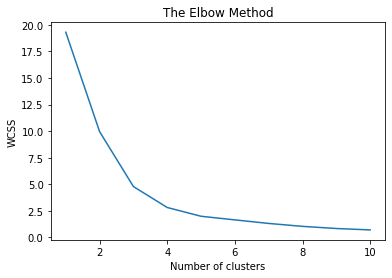

In [82]:
# K-Means Clustering
# Using the elbow method to find the optimal number of clusters (7)
# wcss: within cluster sum of errors
from sklearn.cluster import KMeans
wcss = []
reduced_features = sklearn_pca.fit_transform(features.toarray())




for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
from sklearn.cluster import KMeans
#KMeans clustering
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1)
model.fit(features)
kmeans_predict = model.predict(features)
print (kmeans_predict)
#print (len(kmeans_predict))

[6 6 6 ... 5 2 3]


In [109]:
#evaluation of KMeans
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(df.book_id.values, kmeans_predict))


-0.07333333333333325


In [110]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
homogeneity_score(df.book_id, kmeans_predict)

0.5297611256508493

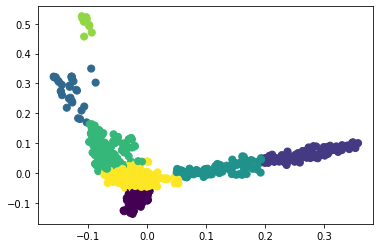

In [117]:
labels = KMeans(7, random_state=0).fit_predict(reduced_features)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels,
            s=50, cmap='viridis');

In [35]:
#Testing results by predicting
Y = tfidf.transform(["wrinkling eyes twinkling pleasure wonder thoughtful leave."])
prediction = model.predict(Y)
print(prediction)

[0]


In [26]:

Y = tfidf.transform(["low trembling voice evidence come yet please majesty."])
prediction = model.predict(Y)
print(prediction)

[2]


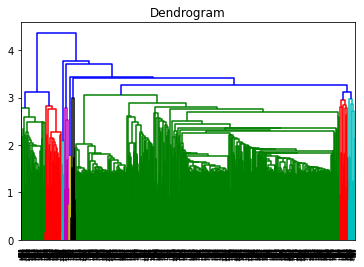

In [112]:
# Using the dendrogram to find the optimal number of clusters (7)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(features.toarray(), method = 'ward'))
plt.title('Dendrogram')
plt.show()

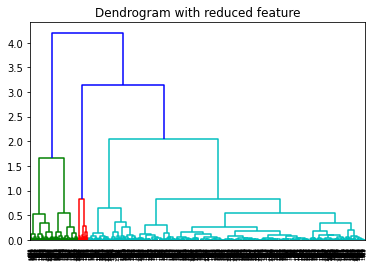

In [118]:
# Using the dendrogram to find the optimal number of clusters (7)
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(reduced_features, method = 'ward'))
plt.title('Dendrogram with reduced feature')
plt.show()

In [28]:
#EM clustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(features.toarray())
gmm = GaussianMixture(n_components=7).fit(Y_sklearn)
labels = gmm.predict(Y_sklearn)
labels

array([3, 6, 6, ..., 4, 4, 1])

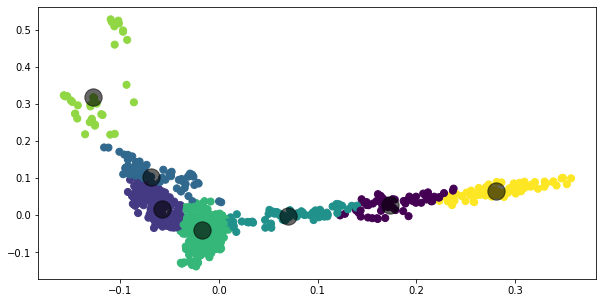

In [38]:
from scipy.stats import multivariate_normal as mvn
centers = np.zeros((7,2))
for i in range(7):
    density = mvn(cov=gmm.covariances_[i], mean=gmm.means_[i]).logpdf(Y_sklearn)
    centers[i, :] = Y_sklearn[np.argmax(density)]
plt.figure(figsize = (10,5))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=labels ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.show()

In [70]:
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
homogeneity_score(df.book_id, gmm.predict(Y_sklearn))


0.4497036917826002

In [40]:
silhouette_score(features, labels=gmm.predict(Y_sklearn))

0.006219554843282705

In [41]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(df.book_id, gmm.predict(Y_sklearn))

0.08499999999999996

In [42]:
# Hierarchy clustering
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features.toarray())

print(len(y_hc))
print(y_hc)
hc.n_clusters_

1400
[2 0 0 ... 2 2 2]


7

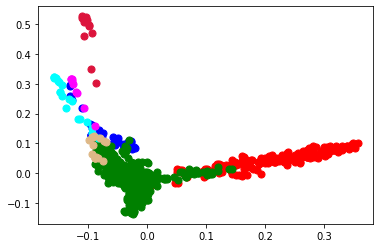

In [43]:
# Visualising the clusters
plt.scatter(Y_sklearn[y_hc == 0, 0], Y_sklearn[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Y_sklearn[y_hc == 1, 0], Y_sklearn[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Y_sklearn[y_hc == 2, 0], Y_sklearn[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(Y_sklearn[y_hc == 3, 0], Y_sklearn[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y_sklearn[y_hc == 4, 0], Y_sklearn[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(Y_sklearn[y_hc == 5, 0], Y_sklearn[y_hc == 5, 1], s = 50, c = 'crimson', label = 'Cluster 6')
plt.scatter(Y_sklearn[y_hc == 6, 0], Y_sklearn[y_hc == 6, 1], s = 50, c = 'burlywood', label = 'Cluster 7')
plt.show()

In [44]:
print(homogeneity_score(df.File_name, hc.labels_))
silhouette_score(features, labels=hc.labels_)

0.2579496625687309


0.013614105620467932

In [45]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(df.book_id, y_hc)

0.15333333333333332

In [51]:
import gensim
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

model_lda = LdaModel(features, 7, common_dictionary)
cm = CoherenceModel(model=model_lda, corpus=features, coherence='u_mass')
coherence = cm.get_coherence() 
print(coherence)

ValueError: ignored